# Bernstein–Vazirani Algorithm

This notebook runs the Bernstein–Vazirani algorithm on a local simulator and a QPU on Amazon Braket. The Bernstein-Vazirani algorithm can find a hidden binary string will certainty after only one call to the quantum circuit. In this way, the hidden string is releaved by querying the oracle that is a superposition of all possible binary strings.

# References 
[1] [Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, doi:10.1137/S0097539796300921.](https://epubs.siam.org/doi/10.1137/S0097539796300921)


# Run on a local simulator

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

from braket.devices import LocalSimulator
from braket.tracking import Tracker

from braket.experimental.algorithms.bernstein_vazirani import (
    bernstein_vazirani_circuit,
    get_bernstein_vazirani_results,
    plot_bitstrings,
    run_bernstein_vazirani
)

tracker = Tracker()

In [2]:
bv_circuit = bernstein_vazirani_circuit("100")
print(bv_circuit)

T  : |0|1| 2 |3|Result Types|
                             
q0 : -H---C---H-Probability--
          |     |            
q1 : -H-I-|-H---Probability--
          |     |            
q2 : -H-I-|-H---Probability--
          |                  
q3 : -H-Z-X------------------

T  : |0|1| 2 |3|Result Types|


In [3]:
local_simulator = LocalSimulator()
task = run_bernstein_vazirani(bv_circuit, local_simulator, shots=1_000)
print(task)

LocalQuantumTask('id':e20aab57-174f-49c1-a100-e80619e84a57)


In [4]:
bv_results = get_bernstein_vazirani_results(task)

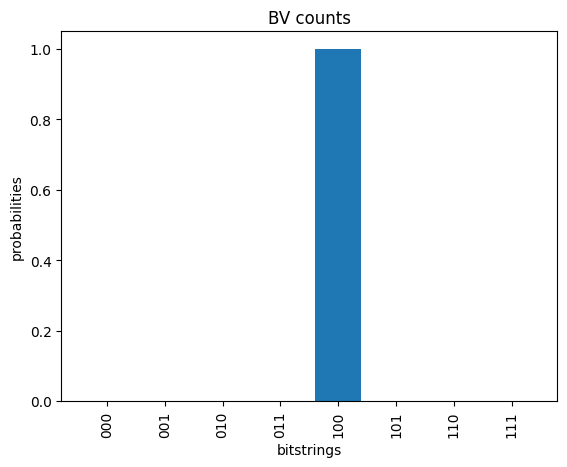

In [5]:
plot_bitstrings(bv_results, title="BV counts")

# Run on a noisy simulator

Let's try a noisy simulator

In [6]:
from braket.circuits.noises import BitFlip, Depolarizing

noisy_bv_circuit = (
    bernstein_vazirani_circuit("100")
    .apply_gate_noise(Depolarizing(0.01))
    .apply_readout_noise(BitFlip(0.1))
)
print(noisy_bv_circuit)

T  : |     0      |     1      |           2           |            3             |Result Types|
                                                                                                
q0 : -H-DEPO(0.01)--------------C-DEPO(0.01)------------H-------DEPO(0.01)-BF(0.1)-Probability--
                                |                                                  |            
q1 : -H-DEPO(0.01)-I-DEPO(0.01)-|-H----------DEPO(0.01)-BF(0.1)--------------------Probability--
                                |                                                  |            
q2 : -H-DEPO(0.01)-I-DEPO(0.01)-|-H----------DEPO(0.01)-BF(0.1)--------------------Probability--
                                |                                                               
q3 : -H-DEPO(0.01)-Z-DEPO(0.01)-X-DEPO(0.01)------------BF(0.1)---------------------------------

T  : |     0      |     1      |           2           |            3             |Result Types|


In [7]:
local_simulator = LocalSimulator("braket_dm")

task = run_bernstein_vazirani(noisy_bv_circuit, local_simulator, shots=1_000)

noisy_bv_results = get_bernstein_vazirani_results(task)

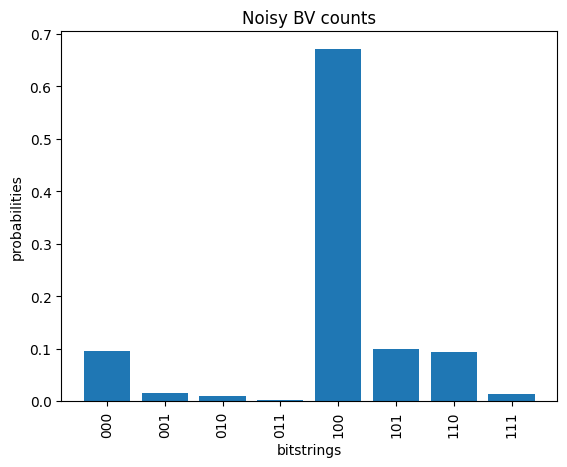

In [8]:
plot_bitstrings(noisy_bv_results, title="Noisy BV counts")

Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).